# Dados enviesados e machine learning

- https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('CSVs/house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

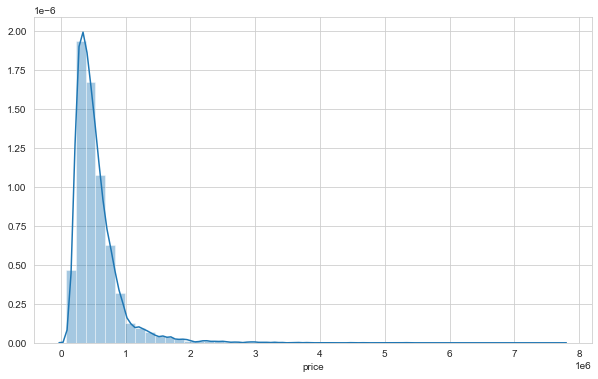

In [5]:
_, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['price'], ax=ax)
ax.ticklabel_format(scilimits=(0,0))

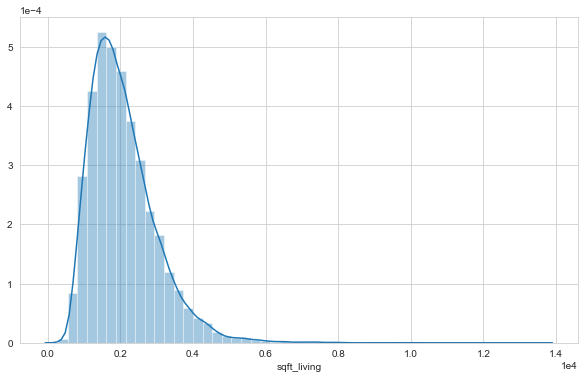

In [6]:
_, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['sqft_living'], ax=ax)
ax.ticklabel_format(scilimits=(0,0))

## Sem tratamento de dados

In [7]:
X = df['sqft_living'].values

In [8]:
X.shape

(21613,)

In [9]:
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [10]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [11]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [12]:
pred = reg.predict(X)
pred

array([287555.06702451, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [13]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [14]:
mean_absolute_error(y, pred)

173688.2733595313

In [15]:
r2_score(y, pred)

0.4928532179037931

## Com tratamento de dados

In [16]:
X_log = np.log(X)
X_log

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

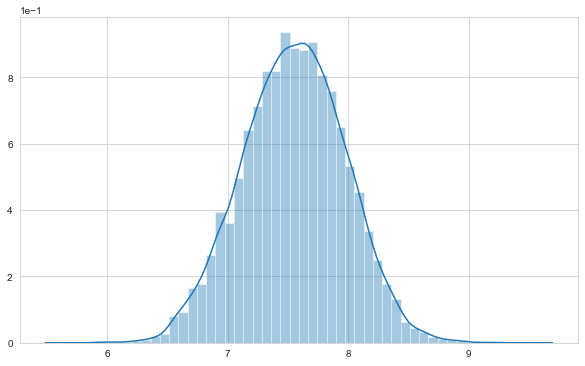

In [17]:
_, ax = plt.subplots(figsize=(10,6))
sns.distplot(X_log, ax=ax)
ax.ticklabel_format(scilimits=(0,0))

In [18]:
reg = LinearRegression()
reg.fit(X_log, y)
pred = reg.predict(X_log)
mean_absolute_error(y, pred)

187308.7468220667

In [19]:
r2_score(y, pred)

0.3741814092179204

In [20]:
y_log = np.log(y)

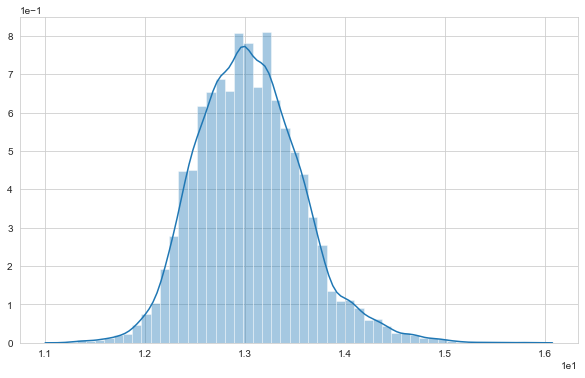

In [21]:
_, ax = plt.subplots(figsize=(10,6))
sns.distplot(y_log, ax=ax)
ax.ticklabel_format(scilimits=(0,0))

In [22]:
reg = LinearRegression()
reg.fit(X_log, y_log)
pred = reg.predict(X_log)
mean_absolute_error(y_log, pred)

0.314671784942507

In [23]:
r2_score(y_log, pred)

0.45550706431577015

In [24]:
import datetime as dt

In [25]:
def int_date(x):
    return pd.Timedelta(dt.datetime.now(tz=dt.timezone.utc).strftime('%Y%m%d')).value - pd.Timedelta(x[:8]).value

In [26]:
df['date'] = df['date'].apply(lambda x: int_date(x))

In [27]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [28]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [29]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [30]:
df['date'][0]

69107

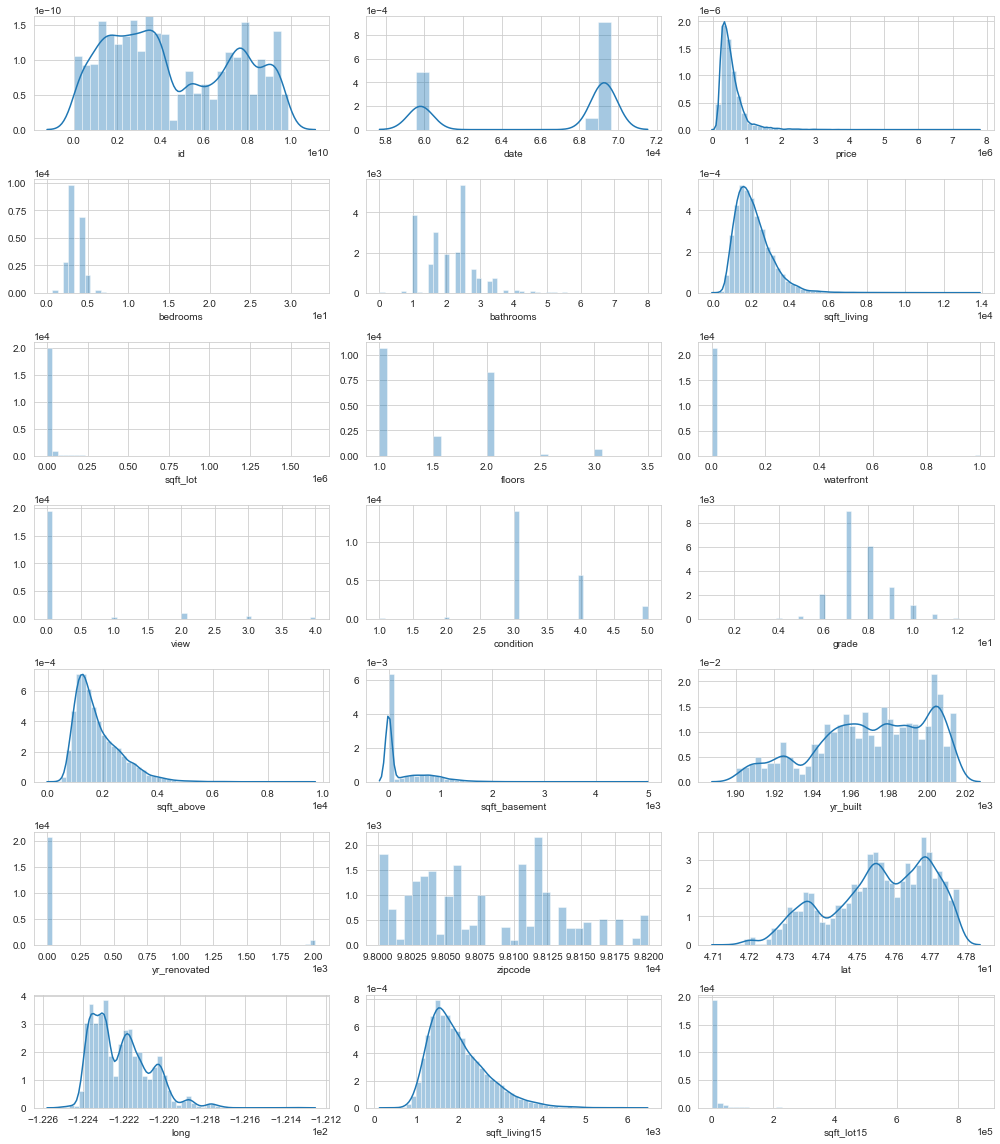

In [31]:
l, c = 0,0
_, ax = plt.subplots(7, 3, figsize=(14,16))

for i, col in enumerate(df.columns):
    
    kde = True if col not in ['waterfront','bathrooms','bedrooms','view','yr_renovated','floors','sqft_lot','sqft_lot15','zipcode','condition', 'grade'] else False
    
    sns.distplot(df[col], ax=ax[l][c], kde = kde)
    ax[l][c].ticklabel_format(scilimits=(0,0))
    
    if c == 2:
        l+=1
        c=0
    else:
        c+=1
        
plt.tight_layout()

In [32]:
X = df.drop('price', axis=1).values
X

array([[ 7.12930052e+09,  6.91070000e+04,  3.00000000e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  6.89110000e+04,  3.00000000e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03],
       [ 5.63150040e+09,  5.98950000e+04,  2.00000000e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  8.06200000e+03],
       ...,
       [ 1.52330014e+09,  6.94970000e+04,  2.00000000e+00, ...,
        -1.22299000e+02,  1.02000000e+03,  2.00700000e+03],
       [ 2.91310100e+08,  6.00040000e+04,  3.00000000e+00, ...,
        -1.22069000e+02,  1.41000000e+03,  1.28700000e+03],
       [ 1.52330016e+09,  6.91050000e+04,  2.00000000e+00, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

In [33]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [34]:
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
mean_absolute_error(y, pred)

125551.74560785947

In [35]:
r2_score(y, pred)

0.7013616931536595

In [36]:
df['price'] = np.log(df['price'].values)
df['sqft_living'] = np.log(df['sqft_living'].values)
df['sqft_above'] = np.log(df['sqft_above'].values)
df['sqft_living15'] = np.log(df['sqft_living15'].values)
df['sqft_lot'] = np.log(df['sqft_lot'].values)
df['sqft_lot15'] = np.log(df['sqft_lot15'].values)

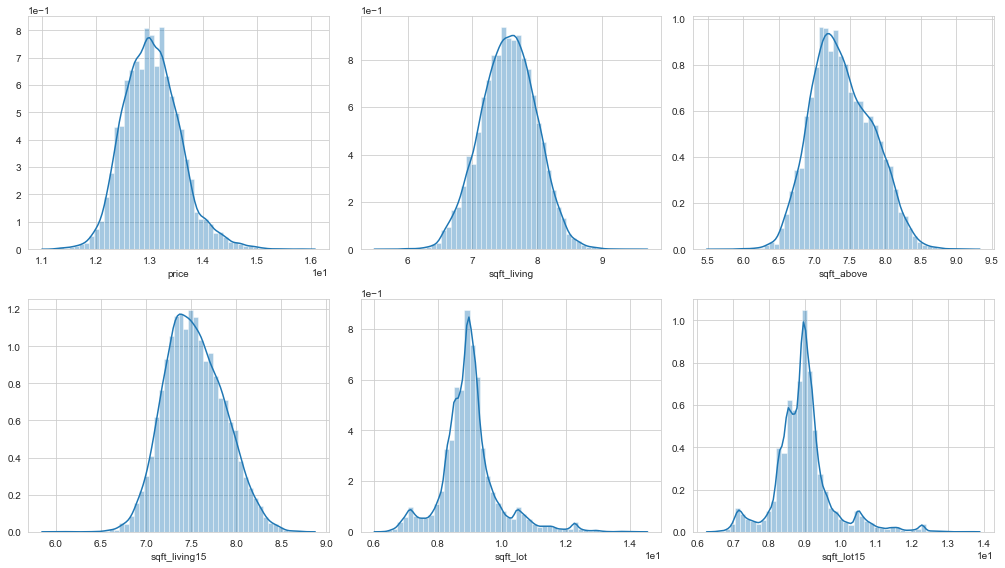

In [37]:
l, c = 0,0
_, ax = plt.subplots(2, 3, figsize=(14,8))

cols = ['price','sqft_living','sqft_above','sqft_living15','sqft_lot','sqft_lot15']

for i, col in enumerate(cols):
    
    #kde = True if col not in ['waterfront','bathrooms','bedrooms','view','yr_renovated','floors','sqft_lot','sqft_lot15','zipcode','condition', 'grade'] else False
    
    sns.distplot(df[col], ax=ax[l][c])
    ax[l][c].ticklabel_format(scilimits=(0,0))
    
    if c == 2:
        l+=1
        c=0
    else:
        c+=1
        
plt.tight_layout()

In [38]:
X = df.drop('price', axis=1).values
X

array([[ 7.12930052e+09,  6.91070000e+04,  3.00000000e+00, ...,
        -1.22257000e+02,  7.20042489e+00,  8.63941082e+00],
       [ 6.41410019e+09,  6.89110000e+04,  3.00000000e+00, ...,
        -1.22319000e+02,  7.43248381e+00,  8.94102198e+00],
       [ 5.63150040e+09,  5.98950000e+04,  2.00000000e+00, ...,
        -1.22233000e+02,  7.90838716e+00,  8.99491694e+00],
       ...,
       [ 1.52330014e+09,  6.94970000e+04,  2.00000000e+00, ...,
        -1.22299000e+02,  6.92755791e+00,  7.60439635e+00],
       [ 2.91310100e+08,  6.00040000e+04,  3.00000000e+00, ...,
        -1.22069000e+02,  7.25134498e+00,  7.16006921e+00],
       [ 1.52330016e+09,  6.91050000e+04,  2.00000000e+00, ...,
        -1.22299000e+02,  6.92755791e+00,  7.21303166e+00]])

In [39]:
X.shape

(21613, 20)

In [40]:
y = df['price'].values
y

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [41]:
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
mean_absolute_error(y, pred)

0.19322624030644914

In [42]:
r2_score(y, pred)

0.7748492634061445

In [43]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X

array([[ 0.88614631,  0.65134259, -0.39873715, ..., -0.30607896,
        -1.03513967, -0.39552412],
       [ 0.63751062,  0.60716342, -0.39873715, ..., -0.74634143,
        -0.32657785, -0.02455203],
       [ 0.36544385, -1.42507844, -1.47395936, ..., -0.13565477,
         1.12653133,  0.04173705],
       ...,
       [-1.06275071,  0.73925012, -1.47395936, ..., -0.60432128,
        -1.86830363, -1.66855887],
       [-1.49104567, -1.40050941, -0.39873715, ...,  1.02891048,
        -0.87966177, -2.21506707],
       [-1.0627507 ,  0.65089178, -1.47395936, ..., -0.60432128,
        -1.86830363, -2.14992494]])

In [49]:
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
mean_absolute_error(y, pred)

0.19322624030644917

In [50]:
r2_score(y, pred)

0.7748492634061445